In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
#import datasets
train_df = pd.read_csv("node_features_train.csv")
test_df = pd.read_csv("node_features_test.csv")

In [17]:
y_train = train_df["y"]
x_train = train_df.drop("y", axis=1)
y_test = test_df["y"]
x_test = test_df.drop("y", axis=1)

<AxesSubplot:>

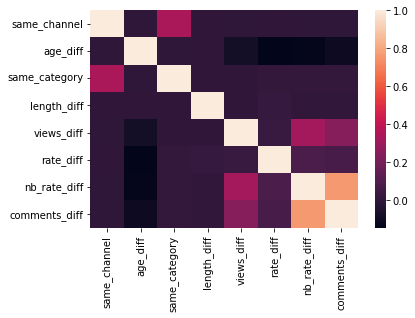

In [18]:
sns.heatmap(x_train.corr())

In [19]:
results = []

#I save the results for each features
for i in x_train.columns:
    res = []
    res.append(i)
    logr = LogisticRegression()
    #fit the model using just one metric
    logr.fit(x_train[i].values.reshape(-1, 1),y_train)
    #save the coefficient
    res.append(float(logr.coef_[0]))
    #save the accuracy
    res.append(accuracy_score(y_test, logr.predict(x_test[i].values.reshape(-1, 1))))
    #save the F1 score
    res.append(f1_score(y_test, logr.predict(x_test[i].values.reshape(-1, 1))))
    results.append(res)

In [20]:
metrics_scores = pd.DataFrame(results, columns = ["Metric", "Coefficient", "Accuracy","F1-score"])

In [21]:
# how much it
metrics_scores

,Metric,Coefficient,Accuracy,F1-score
0,same_channel,8.173702e+00,0.598046,0.327927
1,age_diff,1.003052e-05,0.481951,0.472332
2,same_category,2.419187e+00,0.746394,0.709777
3,length_diff,2.075392e-06,0.505887,0.507572
4,views_diff,5.172234e-07,0.521786,0.531641
5,rate_diff,1.833908e-02,0.489321,0.449431
6,nb_rate_diff,3.420373e-04,0.512940,0.500216
7,comments_diff,6.819028e-04,0.506456,0.475029


# Fittiamo un random forest per lo sport

In [22]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('decision_tree', RandomForestClassifier())], 
    verbose = True)

In [23]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=  36.4s


Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree', RandomForestClassifier())],
         verbose=True)

Text(0.5, 0, 'Random Forest Feature Importance')

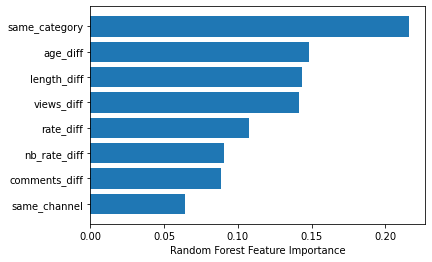

In [24]:
sorted_idx = pipeline["decision_tree"].feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], pipeline["decision_tree"].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [25]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.7470281490159624
